In [1]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import nltk


def percentage (part, whole):
    return 100 * float(part)/float(whole)

consumerKey = "08bPamgsP5hiCc28XyO1guECJ"
consumerSecret = "Ryq7BsWmyydrj7osj2bHX6ARQ15MXh8eRclboLv1SqljVRURZr"
accessToken = "1150022343818981376-e89DA7CsFnFfFtG2oArWRakcG3mKkW"
accessTokenSecret = "YBIcLywmQsDxjXgGuQubMxWZpwGrzXpehSMVjYBtcbVTf"


auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

searchTerm = input("Enter keyword/hashtag to search about: ")
noOfSearchTerms = int(input("Enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(noOfSearchTerms)


Enter keyword/hashtag to search about: kenya
Enter how many tweets to analyze: 200


RT @FRIDAfund: Read @_fromtheroots's piece on #indigenous #women in #Kenya reinstating their native agricultural practices, to build resili…
RT @FRIDAfund: Read @_fromtheroots's piece on #indigenous #women in #Kenya reinstating their native agricultural practices, to build resili…
Read @_fromtheroots's piece on #indigenous #women in #Kenya reinstating their native agricultural practices, to bui… https://t.co/CTN5k5PGlN
''In the face of growing climate change, indigenous women in Kenya are remembering and reinstating their native agr… https://t.co/7z4WYUo8r2
RT @OGR_EN: In response to cultural &amp; #climatecrisis, #indigenous women in Kenya remember &amp; reinstate their agricultural practices to recla…
RT @OGR_EN: In response to cultural &amp; #climatecrisis, #indigenous women in Kenya remember &amp; reinstate their agricultural practices to recla…
RT @OGR_EN: In response to cultural &amp; #climatecrisis, #indigenous women in Kenya remember &amp; reinstate their agricultural practices

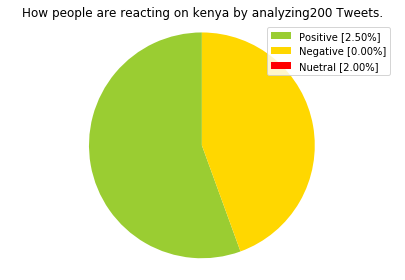

In [2]:
positive = 0
negative = 0
nuetral = 0
polarity = 0



for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity

    if (analysis.sentiment.polarity == 0):
        nuetral += 1
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1


positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
nuetral = percentage(nuetral, noOfSearchTerms)
polarity = percentage(polarity, noOfSearchTerms)

positive = format(positive, '.2f')
negative = format(negative, '.2f')
nuetral = format(nuetral, '.2f')


print('How people are reacting on ' +searchTerm + ' by analyzing' + str(noOfSearchTerms) + ' Tweets.')

if (polarity == 0):
    print("Nuetral")
elif (polarity == 0.00):
    print("Negative")
elif (polarity == 0.00):
    print("Positive")


labels = ['Positive ['+str(positive)+'%]', 'Negative ['+str(negative)+'%]', 'Nuetral ['+str(nuetral)+'%]']
sizes = [positive, nuetral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ' +searchTerm + ' by analyzing' + str(noOfSearchTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()
